In [1]:
def pla(w, x, y, step_size, passes, prediction):
    
    for c in range(passes):
        updated = False
        
        y_prediction = w[0]
        for i in range(len(x)):
            for j in range(len(x[i])):
                print("i is:", i, " and j is:", j)
                y_prediction += w[j+1]*x[i][j]
                prediction[i] = y_prediction

            if y_prediction * y[i] < 0:
                updated = True
                for j in range(len(w)):
                    print("new j is:", j)
                    if j > 0:
                        w[j] = w[j] + step_size * y[i] * x[i][j-1]
                    else:
                        w[j] = w[j] + step_size * y[i] * 1
        
        if not updated:
            break
            
    
                    

AxesSubplot(0.125,0.125;0.62x0.755)


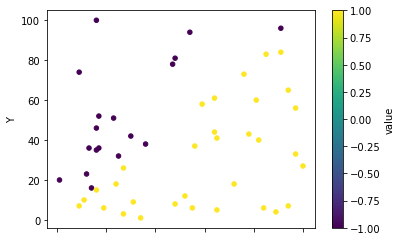

In [19]:
import random
import time
import pandas as pd

w,h = 2,50
points = [[0 for x in range(w)] for y in range(h)] 

random.seed(time.time())

linearly_separable = True

# Initialize points and their values
for i in range(50):
    
    #Create random point
    points[i][0] = random.randint(1,100)
    points[i][1] = random.randint(1,100)
    
    # Point's position relative to x = y line determines value
    if (points[i][0] >=  points[i][1]):
        points[i].append(1)
    else:
        points[i].append(-1)
        
    # unless we don't want it to be specifically linearly separable
    # then 10% of the time switch the value up
    if (not linearly_separable and random.randint(1,10) % 10):
        points[i][2] *= -1
    

df = pd.DataFrame(points, columns=("X", "Y", "value"))
print(df.plot.scatter(x="X", y="Y", c="value", cmap='viridis'))
print(df.to_string(index=False))

In [3]:
w = [1.0, 0.5, 0.5]
#type(w[0])

pla(w, points, cls, 1, 100, prediction)

i is: 0  and j is: 0
i is: 0  and j is: 1
i is: 1  and j is: 0
i is: 1  and j is: 1
i is: 2  and j is: 0
i is: 2  and j is: 1
i is: 3  and j is: 0
i is: 3  and j is: 1
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23

i is: 40  and j is: 1
i is: 41  and j is: 0
i is: 41  and j is: 1
i is: 42  and j is: 0
i is: 42  and j is: 1
i is: 43  and j is: 0
i is: 43  and j is: 1
i is: 44  and j is: 0
i is: 44  and j is: 1
i is: 45  and j is: 0
i is: 45  and j is: 1
i is: 46  and j is: 0
i is: 46  and j is: 1
i is: 47  and j is: 0
i is: 47  and j is: 1
i is: 48  and j is: 0
i is: 48  and j is: 1
i is: 49  and j is: 0
i is: 49  and j is: 1
i is: 0  and j is: 0
i is: 0  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 1  and j is: 0
i is: 1  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 2  and j is: 0
i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is

new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 27  and j is: 0
i is: 27  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 28  and j is: 0
i is: 28  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 29  and j is: 0
i is: 29  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 30  and j is: 0
i is: 30  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 31  and j is: 0
i is: 31  

i is: 48  and j is: 0
i is: 48  and j is: 1
i is: 49  and j is: 0
i is: 49  and j is: 1
i is: 0  and j is: 0
i is: 0  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 1  and j is: 0
i is: 1  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 2  and j is: 0
i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is

i is: 38  and j is: 1
i is: 39  and j is: 0
i is: 39  and j is: 1
i is: 40  and j is: 0
i is: 40  and j is: 1
i is: 41  and j is: 0
i is: 41  and j is: 1
i is: 42  and j is: 0
i is: 42  and j is: 1
i is: 43  and j is: 0
i is: 43  and j is: 1
i is: 44  and j is: 0
i is: 44  and j is: 1
i is: 45  and j is: 0
i is: 45  and j is: 1
i is: 46  and j is: 0
i is: 46  and j is: 1
i is: 47  and j is: 0
i is: 47  and j is: 1
i is: 48  and j is: 0
i is: 48  and j is: 1
i is: 49  and j is: 0
i is: 49  and j is: 1
i is: 0  and j is: 0
i is: 0  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 1  and j is: 0
i is: 1  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 2  and j is: 0
i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j

new j is: 2
i is: 30  and j is: 0
i is: 30  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 31  and j is: 0
i is: 31  and j is: 1
i is: 32  and j is: 0
i is: 32  and j is: 1
i is: 33  and j is: 0
i is: 33  and j is: 1
i is: 34  and j is: 0
i is: 34  and j is: 1
i is: 35  and j is: 0
i is: 35  and j is: 1
i is: 36  and j is: 0
i is: 36  and j is: 1
i is: 37  and j is: 0
i is: 37  and j is: 1
i is: 38  and j is: 0
i is: 38  and j is: 1
i is: 39  and j is: 0
i is: 39  and j is: 1
i is: 40  and j is: 0
i is: 40  and j is: 1
i is: 41  and j is: 0
i is: 41  and j is: 1
i is: 42  and j is: 0
i is: 42  and j is: 1
i is: 43  and j is: 0
i is: 43  and j is: 1
i is: 44  and j is: 0
i is: 44  and j is: 1
i is: 45  and j is: 0
i is: 45  and j is: 1
i is: 46  and j is: 0
i is: 46  and j is: 1
i is: 47  and j is: 0
i is: 47  and j is: 1
i is: 48  and j is: 0
i is: 48  and j is: 1
i is: 49  and j is: 0
i is: 49  and j is: 1
i is: 0  and j is: 0
i is: 0  and j is: 1
i is: 1  and j is: 0
i is: 1  

i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 27  and j is: 0
i is: 27  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 28  and j is: 0
i is: 28  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 29  and j is: 0
i is: 29  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 30  and j is: 0
i is: 30  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 31  and j is: 0
i is: 31  and j is: 1
i is: 32  and j is: 0
i is: 32  and j is: 1
i is: 33  and j is: 0
i is: 33  and j is: 1
i is: 34  and j is: 0
i is: 34  and j is: 1
i is: 35  and j is: 0
i is: 35  and j is: 1
i is: 36  and j is: 0
i is: 36  and 

i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 27  and j is: 0
i is: 27  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 28  and j is: 0
i is: 28  and j is: 1
new j is: 0
new j is

i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is:

new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j 

i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and

i is: 0  and j is: 1
i is: 1  and j is: 0
i is: 1  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 2  and j is: 0
i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j i

i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j 

i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and

i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and

i is: 2  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is:

i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 27  and j is: 0
i is: 27  and j is: 1
n

i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 27  and j is: 0
i is: 27  and j i

i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j is: 0
i is: 25  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 26  and j is: 0
i is: 26  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 27  and j is: 0
i is: 27  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 28  and j is: 0
i is: 28  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 29  and j is: 0
i is: 29  and j is: 1
new j is: 0
new j is: 1
new j is: 2


new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i is: 23  and j is: 0
i is: 23  and j is: 1
i is: 24  and j is: 0
i is: 24  and j is: 1
i is: 25  and j 

new j is: 1
new j is: 2
i is: 3  and j is: 0
i is: 3  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 4  and j is: 0
i is: 4  and j is: 1
i is: 5  and j is: 0
i is: 5  and j is: 1
i is: 6  and j is: 0
i is: 6  and j is: 1
i is: 7  and j is: 0
i is: 7  and j is: 1
i is: 8  and j is: 0
i is: 8  and j is: 1
i is: 9  and j is: 0
i is: 9  and j is: 1
i is: 10  and j is: 0
i is: 10  and j is: 1
i is: 11  and j is: 0
i is: 11  and j is: 1
i is: 12  and j is: 0
i is: 12  and j is: 1
i is: 13  and j is: 0
i is: 13  and j is: 1
i is: 14  and j is: 0
i is: 14  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 15  and j is: 0
i is: 15  and j is: 1
new j is: 0
new j is: 1
new j is: 2
i is: 16  and j is: 0
i is: 16  and j is: 1
i is: 17  and j is: 0
i is: 17  and j is: 1
i is: 18  and j is: 0
i is: 18  and j is: 1
i is: 19  and j is: 0
i is: 19  and j is: 1
i is: 20  and j is: 0
i is: 20  and j is: 1
i is: 21  and j is: 0
i is: 21  and j is: 1
i is: 22  and j is: 0
i is: 22  and j is: 1
i 

In [4]:
print(prediction)

[36079.0, -67855.5, -127629.5, -20727.0, 232747.5, 867589.5, 789691.5, 1053883.5, 1329012.0, 705544.5, 896088.0, 889464.0, 767133.0, 69423.0, -373188.0, -39511.5, 326488.0, 625533.0, 1246050.5, 1134961.5, 1074903.0, 1497288.5, 1663822.5, 1850259.5, 1777151.0, 1436638.5, 1506026.5, 874321.5, 88680.0, -16478.0, -260581.5, -1050676.0, -1558001.5, -1143648.0, -1694402.0, -2459696.0, -2618299.0, -2773274.5, -2907293.5, -3287908.0, -3609771.0, -3066541.5, -3063833.0, -3160326.5, -3616319.0, -4350476.5, -4502743.5, -5113928.0, -5770273.0, -6364508.5]


In [5]:
print(cls)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [6]:
print(w)

[-26.0, -9963.5, 7418.5]
